In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
from torch import Tensor
print(torch.__version__)

2.0.0+cu118


In [ ]:

# Install required packages.
import os
os.environ['TORCH'] = torch.__version__

!pip install torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install pyg-lib -f https://data.pyg.org/whl/nightly/torch-${TORCH}.html
!pip install git+https://github.com/pyg-team/pytorch_geometric.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-2.0.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 31.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-2.0.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 33.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/nightly/torch-2.0.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 32.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/pyg-team/pytorch_geometric.git to /tmp/pip-req-build-zneyxra2
  Running command git clone --filter=blob:none --quiet https://githu

In [ ]:
!pip install sentence-transformers
import os.path as osp

import pandas as pd
import torch
from sentence_transformers import SentenceTransformer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 62.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 60.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 74.9 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125926 sha256=d99bcf1518d063d68e79dd2946a3904d5ee409baefdd547cdf59d8c6c294dea8
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


## Heterogeneous Graph Creation

First, we download the dataset to an arbitrary folder (in this case, the current directory):

In [ ]:
import pandas as pd
import random
random.seed(42)
anime_csv = pd.read_csv("/content/drive/MyDrive/Data/Anime/anime_with_synopsis.csv")
# anime_synopsis = pd.read_csv("anime_with_synopsis.csv")
# animelist = pd.read_csv("animelist.csv")
rating = pd.read_csv("/content/drive/MyDrive/Data/Anime/rating_complete.csv")
anime_csv.head()
# anime_df = pd.merge(anime_csv, anime_synopsis[['MAL_ID', 'sypnopsis']], on='MAL_ID', how='left')
# anime_df["sypnopsis"].fillna("Unknown",inplace = True)
df = pd.merge(rating, anime_csv[['Name','MAL_ID', 'Genres',"sypnopsis"]],left_on="anime_id", right_on='MAL_ID', how='left')
# anime_df["sypnopsis"].fillna("Unknown",inplace = True)
df.drop("MAL_ID",axis=1,inplace=True)
df.head(10)
random_integers = random.sample(list(rating["user_id"].unique()), 500)
df=df[df['user_id'].isin(random_integers)]

In [ ]:
df.shape
anime_csv.head(2)

,MAL_ID,Name,Score,Genres,sypnopsis
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space","other day, another bounty—such is the life of ..."


In [ ]:
df.head(10)

,user_id,anime_id,rating,Name,Genres,sypnopsis
32796,249,5081,9,Bakemonogatari,"Romance, Supernatural, Mystery, Vampire","Koyomi Araragi, a third-year high school stude..."
32797,249,10863,9,Steins;Gate: Oukoubakko no Poriomania,"Sci-Fi, Comedy, Thriller","few months after the events of Steins;Gate , R..."
32798,249,4975,8,ChäoS;HEAd,"Sci-Fi, Harem, Mystery, Psychological, Superna...","Throughout Shibuya, a series of murders dubbed..."
32799,249,9253,9,Steins;Gate,"Thriller, Sci-Fi",The self-proclaimed mad scientist Rintarou Oka...
32800,249,2476,7,School Days,"Harem, Drama, Romance, School",High school student Makoto Itou first notices ...
32801,249,4214,7,Rosario to Vampire Capu2,"Comedy, Ecchi, Fantasy, Harem, Romance, School...",It has been one year since Tsukune Aono enroll...
32802,249,2993,7,Rosario to Vampire,"Harem, Comedy, Romance, Ecchi, Vampire, Fantas...",Youkai Academy is a seemingly normal boarding ...
32803,249,10620,9,Mirai Nikki,"Action, Mystery, Psychological, Shounen, Super...","onely high school student, Yukiteru Amano, spe..."
32804,249,10790,8,Kore wa Zombie Desu ka? of the Dead,"Action, Harem, Comedy, Supernatural, Magic, Ecchi",kawa Ayumu was revived as a zombie by the cute...
32805,249,8841,8,Kore wa Zombie Desu ka?,"Action, Comedy, Ecchi, Harem, Magic, Supernatural",umu Aikawa is a 16-year-old high school studen...


In [ ]:
df["sypnopsis"]=df["sypnopsis"].fillna('undefined')
df["Genres"]=df["Genres"].fillna('undefined')
for i in df.sypnopsis.unique():
  if type(i) == float:
    print(i)


In [ ]:
unique_user_id = df['user_id'].unique()
unique_user_id = pd.DataFrame(data={
    'userId': unique_user_id,
    'mappedID': pd.RangeIndex(len(unique_user_id)),
})
print("Mapping of user IDs to consecutive values:")
print("==========================================")
print(unique_user_id.head())
print()
# Create a mapping from unique movie indices to range [0, num_movie_nodes):
unique_movie_id = df['anime_id'].unique()
unique_movie_id = pd.DataFrame(data={
    'animeId': unique_movie_id,
    'mappedID': pd.RangeIndex(len(unique_movie_id)),
})
print("Mapping of movie IDs to consecutive values:")
print("===========================================")
print(unique_movie_id.head())

Mapping of user IDs to consecutive values:
   userId  mappedID
0     249         0
1     349         1
2    1013         2
3    1295         3
4    1945         4

Mapping of movie IDs to consecutive values:
   animeId  mappedID
0     5081         0
1    10863         1
2     4975         2
3     9253         3
4     2476         4


In [ ]:
ratings_user_id = pd.merge(df['user_id'], unique_user_id,
                            left_on='user_id', right_on='userId', how='left')

ratings_user_id = torch.from_numpy(ratings_user_id['mappedID'].values)
ratings_movie_id = pd.merge(df['anime_id'], unique_movie_id,
                            left_on='anime_id', right_on='animeId', how='left')
# print(torch.arange(len(unique_movie_id)))
unique_movie_id.head(10)
ratings_movie_id = torch.from_numpy(ratings_movie_id['mappedID'].values)

In [ ]:
edge_index_user_to_movie = torch.stack([ratings_user_id, ratings_movie_id], dim=0)
print("Final edge indices pointing from users to movies:")
print("=================================================")
print(edge_index_user_to_movie)

Final edge indices pointing from users to movies:
tensor([[  0,   0,   0,  ..., 499, 499, 499],
        [  0,   1,   2,  ..., 595, 792, 599]])


In [ ]:
unique_user_id
user_mapping = dict(zip(unique_user_id.userId, unique_user_id.mappedID))
anime_mapping=dict(zip(unique_movie_id.animeId, unique_movie_id.mappedID))

In [ ]:
df["userId_mapping"]=df["user_id"].apply(lambda x: user_mapping[x])
df["animeId_mapping"]=df["anime_id"].apply(lambda x: anime_mapping[x])

In [ ]:
v=set(g.strip() for col in df["Genres"].values for g in col.split(","))
# for col in df["Genres"].values :
#   print(col)

In [ ]:

class SequenceEncoder(object):
    # The 'SequenceEncoder' encodes raw column strings into embeddings.  all-MiniLM-L6-v2
    def __init__(self, model_name='multi-qa-MiniLM-L6-cos-v1', device=None):
        self.device = device
        self.model = SentenceTransformer(model_name, device=device)

    @torch.no_grad()
    def __call__(self, df):
        x = self.model.encode(df.values, show_progress_bar=True,
                              convert_to_tensor=True, device=self.device)
        print("sentence embedding size: ",x.size())
        return x.cpu()

class IdentityEncoder(object):
    # The 'IdentityEncoder' takes the raw column values and converts them to
    # PyTorch tensors.
    def __init__(self, dtype=None):
        self.dtype = dtype

    def __call__(self, df):
        return torch.from_numpy(df.values).view(-1, 1).to(self.dtype)

class GenresEncoder(object):
    # The 'GenreEncoder' splits the raw column strings by 'sep' and converts
    # individual elements to categorical labels.
    def __init__(self, sep='|'):
        self.sep = sep

    def __call__(self, df):
        genres = set(g.strip() for col in df.values for g in col.split(self.sep))
        print(len(genres))
        print(sorted(list(genres)))
        mapping = {genre: i for i, genre in enumerate(genres)}

        x = torch.zeros(len(df), len(mapping))
        for i, col in enumerate(df.values):
            for genre in col.split(self.sep):
                x[i, mapping[genre.strip()]] = 1
        print("genre embedding size: ",x.size())
        return x

def load_edge_csv(ratings_user_id, ratings_movie_id):
    user_anime_rating=dict(zip(list(zip(df['userId_mapping'], df['animeId_mapping'])), df['rating']))
    print(user_anime_rating)
    edge_label=[]
    for user,anime in zip(ratings_user_id,ratings_movie_id):
      edge_label.append(user_anime_rating[(user.item(),anime.item())])
    return torch.Tensor(edge_label).long()
# def load_edge_csv(path, src_index_col, src_mapping, dst_index_col, dst_mapping,
#                   encoders=None, **kwargs):
#     # df = pd.read_csv(path, **kwargs)

#     src = [src_mapping[index] for index in df[src_index_col]]
#     dst = [dst_mapping[index] for index in df[dst_index_col]]
#     edge_index = torch.tensor([src, dst])


#     return edge_index, edge_attr
def load_node_csv(encoders=None, **kwargs):
    edge_attr = None
    if encoders is not None:
        edge_attrs = [encoder(df[col]) for col, encoder in encoders.items()]
        edge_attr = torch.cat(edge_attrs, dim=-1)

    return edge_attr

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

vals=load_node_csv(encoders={
        'sypnopsis': SequenceEncoder(device=device),
        'Genres': GenresEncoder(sep=",")
    })
edge_weight=load_edge_csv(ratings_user_id, ratings_movie_id)

# df["anime_features"]=

Batches:   0%|          | 0/2604 [00:00<?, ?it/s]

sentence embedding size:  torch.Size([83307, 384])
43
['Action', 'Adventure', 'Cars', 'Comedy', 'Dementia', 'Demons', 'Drama', 'Ecchi', 'Fantasy', 'Game', 'Harem', 'Historical', 'Horror', 'Josei', 'Kids', 'Magic', 'Martial Arts', 'Mecha', 'Military', 'Music', 'Mystery', 'Parody', 'Police', 'Psychological', 'Romance', 'Samurai', 'School', 'Sci-Fi', 'Seinen', 'Shoujo', 'Shoujo Ai', 'Shounen', 'Shounen Ai', 'Slice of Life', 'Space', 'Sports', 'Super Power', 'Supernatural', 'Thriller', 'Unknown', 'Vampire', 'Yaoi', 'undefined']
genre embedding size:  torch.Size([83307, 43])
{(0, 0): 9, (0, 1): 9, (0, 2): 8, (0, 3): 9, (0, 4): 7, (0, 5): 7, (0, 6): 7, (0, 7): 9, (0, 8): 8, (0, 9): 8, (0, 10): 8, (0, 11): 9, (0, 12): 9, (0, 13): 8, (0, 14): 7, (0, 15): 8, (0, 16): 8, (0, 17): 8, (0, 18): 7, (0, 19): 5, (0, 20): 10, (0, 21): 6, (1, 22): 5, (1, 23): 5, (1, 24): 5, (1, 25): 1, (1, 26): 6, (1, 27): 8, (1, 28): 5, (1, 29): 8, (1, 30): 7, (1, 1): 5, (1, 3): 7, (1, 31): 7, (1, 32): 4, (1, 33): 7, (

In [ ]:
# print(vals.size(),type(vals),vals[1])
vals_list = [vals[i] for i in range(len(vals))]
# print(vals_list)
df["anime_feat"]=vals_list

In [ ]:
# df["genres_onehot"] = pd.get_dummies(df['Genres'].str.split(', ', expand=True).stack()).sum(level=0)
genres=[]
for val in df["Genres"].values:
  for v in val.split(", "):
    if v.strip() not in genres:genres.append(v.strip())
genres=sorted(genres)
print(genres)

def genre_onehot(data):
  ret=[0]*len(genres)
  for idx,v in enumerate(genres):
    if v in data:ret[idx]=1
  return "".join(str(val) for val in ret)
df["genres_onehot_single"]=df["Genres"].apply(genre_onehot)
df.head(5)

# genres_onehot = pd.get_dummies(df['Genres'].str.split(', ', expand=True).stack())
# print(genres_onehot)
# # concatenate one-hot encoded columns along rows
# df["genres_onehot_single"] = pd.Series(list(np.array(genres_onehot)), name='genres_onehot')

# df.head(5)

['Action', 'Adventure', 'Cars', 'Comedy', 'Dementia', 'Demons', 'Drama', 'Ecchi', 'Fantasy', 'Game', 'Harem', 'Historical', 'Horror', 'Josei', 'Kids', 'Magic', 'Martial Arts', 'Mecha', 'Military', 'Music', 'Mystery', 'Parody', 'Police', 'Psychological', 'Romance', 'Samurai', 'School', 'Sci-Fi', 'Seinen', 'Shoujo', 'Shoujo Ai', 'Shounen', 'Shounen Ai', 'Slice of Life', 'Space', 'Sports', 'Super Power', 'Supernatural', 'Thriller', 'Unknown', 'Vampire', 'Yaoi', 'undefined']


,user_id,anime_id,rating,Name,Genres,sypnopsis,userId_mapping,animeId_mapping,anime_feat,genres_onehot_single
32796,249,5081,9,Bakemonogatari,"Romance, Supernatural, Mystery, Vampire","Koyomi Araragi, a third-year high school stude...",0,0,"[tensor(-0.0806), tensor(0.0966), tensor(-0.04...",0000000000000000000010001000000000000100100
32797,249,10863,9,Steins;Gate: Oukoubakko no Poriomania,"Sci-Fi, Comedy, Thriller","few months after the events of Steins;Gate , R...",0,1,"[tensor(0.0320), tensor(0.0710), tensor(-0.007...",0001000000000000000000000001000000000010000
32798,249,4975,8,ChäoS;HEAd,"Sci-Fi, Harem, Mystery, Psychological, Superna...","Throughout Shibuya, a series of murders dubbed...",0,2,"[tensor(0.0080), tensor(-0.0107), tensor(0.014...",0000000000100000000010010001000000000100000
32799,249,9253,9,Steins;Gate,"Thriller, Sci-Fi",The self-proclaimed mad scientist Rintarou Oka...,0,3,"[tensor(-0.1152), tensor(0.0246), tensor(-0.01...",0000000000000000000000000001000000000010000
32800,249,2476,7,School Days,"Harem, Drama, Romance, School",High school student Makoto Itou first notices ...,0,4,"[tensor(-0.0752), tensor(0.0099), tensor(0.039...",0000001000100000000000001010000000000000000


In [ ]:
unique_movie_id.shape

(7015, 2)

In [ ]:
df.shape

(83307, 10)

In [ ]:
anime_feature = pd.merge(unique_movie_id,df[['anime_id','anime_feat']],
                            left_on='animeId', right_on='anime_id', how='left')
anime_feature.head(5)

,animeId,mappedID,anime_id,anime_feat
0,5081,0,5081,"[tensor(-0.0806), tensor(0.0966), tensor(-0.04..."
1,5081,0,5081,"[tensor(-0.0806), tensor(0.0966), tensor(-0.04..."
2,5081,0,5081,"[tensor(-0.0806), tensor(0.0966), tensor(-0.04..."
3,5081,0,5081,"[tensor(-0.0806), tensor(0.0966), tensor(-0.04..."
4,5081,0,5081,"[tensor(-0.0806), tensor(0.0966), tensor(-0.04..."


In [ ]:
ad=anime_feature.drop_duplicates(subset=["animeId","mappedID"],keep="first")
ad.head(10)

,animeId,mappedID,anime_id,anime_feat
0,5081,0,5081,"[tensor(-0.0806), tensor(0.0966), tensor(-0.04..."
157,10863,1,10863,"[tensor(0.0320), tensor(0.0710), tensor(-0.007..."
240,4975,2,4975,"[tensor(0.0080), tensor(-0.0107), tensor(0.014..."
289,9253,3,9253,"[tensor(-0.1152), tensor(0.0246), tensor(-0.01..."
485,2476,4,2476,"[tensor(-0.0752), tensor(0.0099), tensor(0.039..."
569,4214,5,4214,"[tensor(-0.0212), tensor(0.0562), tensor(0.006..."
625,2993,6,2993,"[tensor(0.0033), tensor(0.0325), tensor(-0.000..."
707,10620,7,10620,"[tensor(-0.0413), tensor(-0.0581), tensor(0.00..."
892,10790,8,10790,"[tensor(-0.0947), tensor(0.0067), tensor(-0.02..."
949,8841,9,8841,"[tensor(-0.0498), tensor(0.0789), tensor(-0.07..."


In [ ]:
ad.sort_values("mappedID",inplace=True)
print(torch.arange(len(unique_movie_id)))
ad.tail(10)

<ipython-input-22-72061594b049>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ad.sort_values("mappedID",inplace=True)


tensor([   0,    1,    2,  ..., 7012, 7013, 7014])


,animeId,mappedID,anime_id,anime_feat
83297,1472,7005,1472,"[tensor(-0.0039), tensor(-0.0404), tensor(-0.0..."
83298,1471,7006,1471,"[tensor(-0.0039), tensor(-0.0404), tensor(-0.0..."
83299,1468,7007,1468,"[tensor(-0.0532), tensor(0.0392), tensor(0.004..."
83300,2460,7008,2460,"[tensor(-0.0085), tensor(-0.0108), tensor(0.09..."
83301,40504,7009,40504,"[tensor(-0.0617), tensor(-0.0016), tensor(0.00..."
83302,1065,7010,1065,"[tensor(-0.0291), tensor(0.0467), tensor(-0.02..."
83303,1539,7011,1539,"[tensor(0.0367), tensor(0.0055), tensor(0.0300..."
83304,1540,7012,1540,"[tensor(0.0269), tensor(0.0088), tensor(0.0588..."
83305,8317,7013,8317,"[tensor(-0.0154), tensor(-0.0401), tensor(0.01..."
83306,159,7014,159,"[tensor(-0.0024), tensor(0.0667), tensor(0.003..."


In [ ]:
from torch_geometric.data import HeteroData
import torch_geometric.transforms as T
import numpy as np
data = HeteroData()

# Save node indices:
data["user"].node_id = torch.arange(len(unique_user_id))
data["anime"].node_id = torch.arange(len(unique_movie_id))

# Add the node features and edge indices:
data["anime"].x = torch.stack(list(ad["anime_feat"].values))#torch.from_numpy(ad["anime_feat"].values) #ad["anime_feat"].values()
data["user", "rates", "anime"].edge_index = edge_index_user_to_movie
data["user", "rates", "anime"].edge_label = edge_weight

# We also need to make sure to add the reverse edges from movies to users
# in order to let a GNN be able to pass messages in both directions.
# We can leverage the `T.ToUndirected()` transform for this from PyG:
data = T.ToUndirected()(data)
print(data["anime"].x)
print(data)

tensor([[-0.0806,  0.0966, -0.0455,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0320,  0.0710, -0.0078,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0080, -0.0107,  0.0142,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0269,  0.0088,  0.0588,  ...,  1.0000,  0.0000,  0.0000],
        [-0.0154, -0.0401,  0.0119,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0024,  0.0667,  0.0036,  ...,  0.0000,  0.0000,  0.0000]])
HeteroData(
  user={ node_id=[500] },
  anime={
    node_id=[7015],
    x=[7015, 427]
  },
  (user, rates, anime)={
    edge_index=[2, 83307],
    edge_label=[83307]
  },
  (anime, rev_rates, user)={
    edge_index=[2, 83307],
    edge_label=[83307]
  }
)


## Defining Edge-level Training Splits

Since our data is now ready-to-be-used, we can split the ratings of users into training, validation, and test splits.
This is needed in order to ensure that we leak no information about edges used during evaluation into the training phase.
For this, we make use of the [`transforms.RandomLinkSplit`](https://pytorch-geometric.readthedocs.io/en/latest/modules/transforms.html#torch_geometric.transforms.RandomLinkSplit) transformation from PyG.
This transforms randomly divides the edges in the `("user", "rates", "movie")` into training, validation and test edges.
The `disjoint_train_ratio` parameter further separates edges in the training split into edges used for message passing (`edge_index`) and edges used for supervision (`edge_label_index`).
Note that we also need to specify the reverse edge type `("movie", "rev_rates", "user")`.
This allows the `RandomLinkSplit` transform to drop reverse edges accordingly to not leak any information into the training phase.

## Defining Mini-batch Loaders

We are now ready to create a mini-batch loader that will generate subgraphs that can be used as input into our GNN.
While this step is not strictly necessary for small-scale graphs, it is absolutely necessary to apply GNNs on larger graphs that do not fit onto GPU memory otherwise.
Here, we make use of the [`loader.LinkNeighborLoader`](https://pytorch-geometric.readthedocs.io/en/latest/modules/loader.html#torch_geometric.loader.LinkNeighborLoader) which samples multiple hops from both ends of a link and creates a subgraph from it.
Here, `edge_label_index` serves as the "seed links" to start sampling from.

In [ ]:
# # In the first hop, we sample at most 20 neighbors.
# # In the second hop, we sample at most 10 neighbors.
# # In addition, during training, we want to sample negative edges on-the-fly with
# # a ratio of 2:1.
# # We can make use of the `loader.LinkNeighborLoader` from PyG:
# from torch_geometric.loader import LinkNeighborLoader

# # Define seed edges:
# edge_label_index = train_data["user", "rates", "anime"].edge_label_index
# edge_label = train_data["user", "rates", "anime"].edge_label

# train_loader = LinkNeighborLoader(
#     data=train_data,
#     num_neighbors=[20, 10],
#     neg_sampling_ratio=1.0,
#     neg_sampling=True,
#     edge_label_index=(("user", "rates", "anime"), edge_label_index),
#     edge_label=edge_label,
#     batch_size=128,
#     shuffle=True,
# )

# # Inspect a sample:
# sampled_data = next(iter(train_loader))

# print("Sampled mini-batch:")
# print("===================")
# print(sampled_data)
# print(sampled_data["user", "rates", "anime"].edge_label.min())
# # assert sampled_data["user", "rates", "movie"].edge_label_index.size(1) == 3 * 128
# assert sampled_data["user", "rates", "anime"].edge_label.min() == 0
# # assert sampled_data["user", "rates", "anime"].edge_label.max() == 1

In [ ]:


del data['anime', 'rev_rates', 'user'].edge_label
del data['anime'].node_id
# data['user'].x=data['user'].node_id.unsqueeze(1)
data['user'].x = torch.eye(data['user'].num_nodes, device=device)
del data['user'].node_id
data

HeteroData(
  user={ x=[500, 500] },
  anime={ x=[7015, 427] },
  (user, rates, anime)={
    edge_index=[2, 83307],
    edge_label=[83307]
  },
  (anime, rev_rates, user)={ edge_index=[2, 83307] }
)

(7515, 7515) (7515, 7515) (7515, 7515)
Edge_labels:  tensor([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
tensor([14995,     0,   253,   345,   621,  1371,  3117,  6001, 11900, 12571,
         8380,  5426])
Weights:  tensor([1.0001e-04, 9.9997e-01, 5.9273e-03, 4.3467e-03, 2.4148e-03, 1.0938e-03,
        4.8110e-04, 2.4989e-04, 1.2602e-04, 1.1929e-04, 1.7895e-04, 2.7637e-04],
       device='cuda:0') 12
Epoch: 001, Loss: 0.6744, Train_loss: 0.6743, Val_loss: 0.6743, Test_loss: 0.6743
Epoch: 002, Loss: 0.6743, Train_loss: 0.6742, Val_loss: 0.6742, Test_loss: 0.6742
Epoch: 003, Loss: 0.6742, Train_loss: 0.6741, Val_loss: 0.6741, Test_loss: 0.6741
Epoch: 004, Loss: 0.6741, Train_loss: 0.6740, Val_loss: 0.6740, Test_loss: 0.6740
Epoch: 005, Loss: 0.6740, Train_loss: 0.6739, Val_loss: 0.6739, Test_loss: 0.6739
Epoch: 006, Loss: 0.6739, Train_loss: 0.6738, Val_loss: 0.6738, Test_loss: 0.6738
Epoch: 007, Loss: 0.6738, Train_loss: 0.6736, Val_loss: 0.6736, Test_loss: 0.6736
Epoch: 008, Loss: 0.6

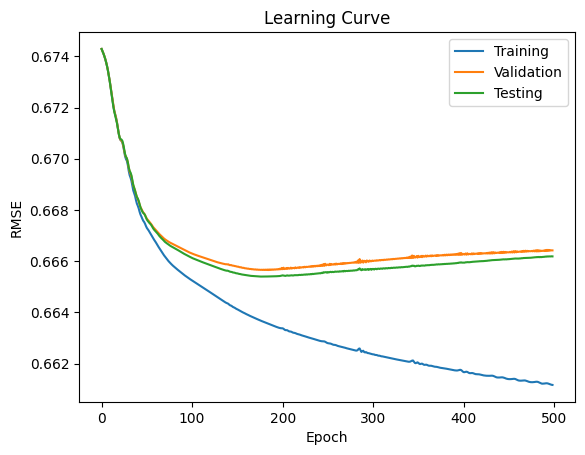

In [ ]:
import argparse
import os.path as osp

import torch
import torch.nn.functional as F

from torch.nn import Linear

import torch_geometric.transforms as T
from torch_geometric.datasets import MovieLens
from torch_geometric.nn import SAGEConv, to_hetero
import os
# os.environ['CUDA_LAUNCH_BLOCKING'] = "1"



device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


train_data, val_data, test_data = T.RandomLinkSplit(
    num_val=0.1,
    num_test=0.3,
    neg_sampling_ratio=0.3,
    edge_types=[('user', 'rates', 'anime')],
    rev_edge_types=[('anime', 'rev_rates', 'user')],
)(data)

print(train_data.size(),test_data.size(),val_data.size())
# We have an unbalanced dataset with many labels for rating 3 and 4, and very
# few for 0 and 1. Therefore we use a weighted MSE loss.
if True:
    weight = torch.bincount(train_data['user','rates', 'anime'].edge_label)
    weight = weight.max() / weight
    weight = torch.tensor([w if w < 9999 else 9999 for w in weight])
else:
    weight = None
weight=F.normalize(weight,dim=0).to(device)
print("Edge_labels: ",train_data['user','rates', 'anime'].edge_label.unique())
print(torch.bincount(train_data['user','rates', 'anime'].edge_label))
print("Weights: ",weight,len(weight))

def weighted_mse_loss(pred, target, weight=None):

    weight = 1. if weight is None else weight[target].to(pred.dtype)
    return (weight * (pred - target.to(pred.dtype)).pow(2)).mean()


class GNNEncoder(torch.nn.Module):
    def __init__(self, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = SAGEConv((-1, -1), hidden_channels)
        self.conv2 = SAGEConv((-1, -1), out_channels)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index).relu()
        x = self.conv2(x, edge_index)
        return x


# class EdgeDecoder(torch.nn.Module):
#     def __init__(self, hidden_channels):
#         super().__init__()
#         self.lin1 = Linear(2 * hidden_channels, hidden_channels)
#         self.lin2 = Linear(hidden_channels, 1)

#     def forward(self, z_dict, edge_label_index):
#         row, col = edge_label_index
#         z = torch.cat([z_dict['user'][row], z_dict['anime'][col]], dim=-1)

#         z = self.lin1(z).relu()
#         z = self.lin2(z)
#         return z.view(-1)

class EdgeDecoder(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        self.lin1 = Linear(2 * hidden_channels, hidden_channels)
        torch.nn.init.xavier_uniform_(self.lin1.weight)
        self.lin2 = Linear(hidden_channels, 12)
        self.lin3=Linear(32, 12)
        self.dropout = torch.nn.Dropout(0.25)
        self.leakyrelu = torch.nn.LeakyReLU(0.4)


    def forward(self, z_dict, edge_label_index):
        row, col = edge_label_index
        z = torch.cat([z_dict['user'][row], z_dict['anime'][col]], dim=-1)

        # z = self.lin1(z).relu()
        z = self.leakyrelu(self.lin1(z))
        # z = self.lin2(self.dropout(z))
        z = self.lin2(z)
        # z = self.lin3(self.lin2(z))
        z=F.softmax(z, dim=-1)

        return z #z.view(-1)


class Model(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        self.encoder = GNNEncoder(hidden_channels, hidden_channels)
        self.encoder = to_hetero(self.encoder, data.metadata(), aggr='sum')
        self.decoder = EdgeDecoder(hidden_channels)

    def forward(self, x_dict, edge_index_dict, edge_label_index):
        z_dict = self.encoder(x_dict, edge_index_dict)
        return self.decoder(z_dict, edge_label_index)


model = Model(hidden_channels=64).to(device)
train_data=train_data.to(device)

# optimizer = torch.optim.Adam(model.parameters(), lr=0.006, weight_decay=0.01)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


def weighted_cross_entropy_loss(pred, target):
    criterion = torch.nn.BCEWithLogitsLoss(pos_weight=weight)
    loss = criterion(pred, target)
    return loss.mean()


def train():
    model.train()
    optimizer.zero_grad()
    pred = model(train_data.x_dict, train_data.edge_index_dict,
                 train_data['user', 'anime'].edge_label_index)

    target = train_data['user', 'anime'].edge_label
    target_long = target.to(torch.long)
    # print("unique target? ",target_long.unique())
    target = F.one_hot(target_long, num_classes=12)
    # print(target.size())
    target=target.float()
    loss = weighted_cross_entropy_loss(pred, target)
    # print(loss)
    accuracy = (torch.argmax(pred, dim=1) == torch.argmax(target, dim=1)).float().mean()
    # print("Accuracy: ", accuracy)
    loss.backward()
    optimizer.step()
    return float(loss)



@torch.no_grad()
def test(data):
    model.eval()
    data=data.to(device)
    pred = model(data.x_dict, data.edge_index_dict,
                 data['user', 'anime'].edge_label_index)
    target = data['user', 'anime'].edge_label
    target_long = target.to(torch.long)
    target = F.one_hot(target_long, num_classes=12)
    target=target.float()
    rmse = weighted_cross_entropy_loss(pred, target)
    return float(rmse)
def test_accScore(data):
    model.eval()
    data=data.to(device)
    pred = model(data.x_dict, data.edge_index_dict,
                 data['user', 'anime'].edge_label_index)
    target = data['user', 'anime'].edge_label
    target_long = target.to(torch.long)
    target = F.one_hot(target_long, num_classes=12)
    target=target.float()
    # print(torch.argmax(pred, dim=1),torch.argmax(target, dim=1))
    accuracy = (torch.argmax(pred, dim=1) == torch.argmax(target, dim=1)).float().mean()
    return float(accuracy)

train_losses = []
val_losses = []
test_losses = []

train_acc = []
val_acc = []
test_acc = []
for epoch in range(1, 500):
    loss = train()
    train_rmse = test(train_data)
    val_rmse = test(val_data)
    test_rmse = test(test_data)
    train_accuracy = test_accScore(train_data)
    val_accuracy = test_accScore(val_data)
    test_accuracy = test_accScore(test_data)
    # print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Train: {train_rmse:.4f}, '
    #       f'Val: {val_rmse:.4f}, Test: {test_rmse:.4f}')
    # if epoch%40==0:
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Train_loss: {train_rmse:.4f}, '
          f'Val_loss: {val_rmse:.4f}, Test_loss: {test_rmse:.4f}')
    train_losses.append(train_rmse)
    val_losses.append(val_rmse)
    test_losses.append(test_rmse)
    train_acc.append(train_accuracy)
    val_acc.append(val_accuracy)
    test_acc.append(test_accuracy)
import matplotlib.pyplot as plt

plt.plot(train_losses, label='Training')
plt.plot(val_losses, label='Validation')
plt.plot(test_losses, label='Testing')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('Learning Curve')
plt.legend()
plt.show()


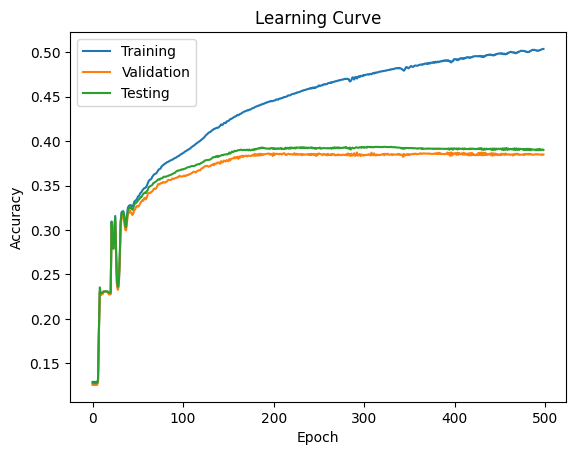

Training acc: 0.5037704110145569Val acc: 0.38489240407943726Test acc: 0.39007046818733215


In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_acc, label='Training')
plt.plot(val_acc, label='Validation')
plt.plot(test_acc, label='Testing')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()
print("Training acc: "+str(train_acc[-1])+"Val acc: "+str(val_acc[-1])+"Test acc: "+str(test_acc[-1]))

In [ ]:
model.eval()
test_data=test_data.to(device)
pred = model(test_data.x_dict, test_data.edge_index_dict,
              test_data['user', 'anime'].edge_label_index)
print(pred[:10])

tensor([[1.3267e-07, 6.2358e-13, 2.3972e-11, 3.7237e-12, 6.9053e-13, 3.5078e-12,
         2.6825e-10, 1.0243e-07, 9.4171e-01, 5.8285e-02, 7.3277e-06, 4.6810e-13],
        [2.0678e-08, 1.2277e-13, 1.7701e-12, 1.6519e-13, 1.3115e-13, 4.2303e-13,
         8.7035e-12, 3.0070e-08, 1.5390e-07, 3.8878e-04, 9.9961e-01, 9.3766e-15],
        [1.3838e-17, 8.1778e-21, 1.4906e-18, 3.4990e-19, 2.2675e-20, 1.1956e-19,
         3.4159e-17, 1.1660e-14, 9.9998e-01, 2.2590e-05, 1.1812e-15, 9.2610e-20],
        [8.5998e-07, 6.8201e-12, 1.9419e-10, 2.0544e-11, 8.3474e-12, 3.8761e-11,
         1.2822e-09, 2.4425e-06, 3.7721e-02, 3.0121e-01, 6.6106e-01, 1.7133e-12],
        [1.0700e-07, 5.3678e-14, 1.1867e-12, 1.5733e-12, 1.0496e-13, 7.2468e-13,
         3.2966e-11, 1.2285e-10, 1.0000e+00, 1.2192e-06, 1.7144e-17, 8.8168e-13],
        [2.3300e-10, 1.1512e-13, 1.6744e-12, 4.7045e-13, 6.6968e-14, 6.9962e-14,
         1.3229e-11, 1.2908e-08, 2.8342e-08, 9.9698e-01, 3.0234e-03, 7.3435e-15],
        [8.4063e-13, 8

In [ ]:

# recom_data=data.clone()
# def find_edge_index(user_id, movie_id, edge_index):
#     for i, (src, dst) in enumerate(edge_index.t().tolist()):
#         if src == user_id and dst == movie_id:
#             return i
#     return None
# edge_idx = find_edge_index(0, 2730, recom_data['user','anime'].edge_index)
# # Example edge index
# edge_index = recom_data['user','anime'].edge_index

# # Number of users and movies
# recom_users=recom_data['user','anime'].edge_index[0].unique()
# recom_anime=recom_data['user','anime'].edge_index[1].unique()
# num_users = len(recom_users)
# num_movies = len(recom_anime)

# # Get the set of movies each user has edges with
# user_movie_set = [set() for _ in range(num_users)]
# for user, movie in edge_index.t().tolist():
#     user_movie_set[user].add(movie)

# # Find users that do not have edges with certain movies
# movies_to_check = recom_anime #[0, 1, 2, 3]  # Example movies to check
# recom_edge_index=[]

# for idx,movies in enumerate(user_movie_set):
#   for m in (set(recom_anime)-movies):
#     recom_edge_index.append([idx,m.item()])
#     # users_without_edge = set(range(num_users)) - set([u for u, m in enumerate(user_movie_set) if movie in m])
#     # for u in users_without_edge:
#     #   recom_edge_index.append([u,movie.item()])
# len(recom_edge_index)

In [ ]:
# recom_edge_index=torch.tensor(recom_edge_index)
# recom_data['user','anime'].edge_index=recom_edge_index.T
# recom_data

HeteroData(
  user={ x=[200, 200] },
  anime={ x=[4646, 427] },
  (user, rates, anime)={
    edge_index=[2, 929200],
    edge_label=[32672]
  },
  (anime, rev_rates, user)={ edge_index=[2, 32672] }
)

In [ ]:
# del recom_data['anime', 'rev_rates', 'user']
# recom_data = T.ToUndirected()(recom_data)
# # del recom_data['user', 'rev_rev_rates', 'anime'].edge_index
# recom_data

HeteroData(
  user={ x=[200, 200] },
  anime={ x=[4646, 427] },
  (user, rates, anime)={
    edge_index=[2, 929200],
    edge_label=[32672]
  },
  (anime, rev_rates, user)={ edge_index=[2, 929200] }
)

In [ ]:
# recom_data=recom_data.to(device)
# train_data, val_data, test_data = T.RandomLinkSplit(
#     num_val=0.1,
#     num_test=0.8,
#     neg_sampling_ratio=0.0,
#     edge_types=[('user', 'rates', 'anime')],
#     rev_edge_types=[('anime', 'rev_rates', 'user')],
# )(recom_data)
# train_data

HeteroData(
  user={ x=[200, 200] },
  anime={ x=[4646, 427] },
  (user, rates, anime)={
    edge_index=[2, 92920],
    edge_label=[92920],
    edge_label_index=[2, 92920]
  },
  (anime, rev_rates, user)={ edge_index=[2, 92920] }
)

In [ ]:
# pred=torch.argmax(pred, dim=1)
print(pred,"",str(pred.size()))

tensor([ 8, 10,  8,  ..., 10,  0,  0], device='cuda:0')  torch.Size([32489])


In [ ]:
from collections import defaultdict
# train_data=train_data.to('cpu')
# pred=pred.to('cpu')

recommendations=defaultdict(list) #[[] for _ in range(num_users)]
for p,(u,a) in zip(pred,test_data['user', 'anime'].edge_index.T):
  # print(p,(u.item(),a.item()))
  recommendations[u.item()].append([a.item(),p.item()])
# recommendations[0]

In [ ]:
sorted_dict = dict(sorted(recommendations.items()))
count = 0
for key, value in sorted_dict.items():
    if count < 10:
        print(key,value)
        count += 1
    else:
        break

0 [[12, 9], [1, 9], [4, 8], [8, 8], [11, 8], [18, 8], [13, 0], [21, 0]]
1 [[235, 10], [203, 10], [82, 10], [186, 10], [1, 10], [0, 10], [30, 10], [170, 10], [283, 10], [174, 10], [242, 10], [44, 10], [234, 9], [297, 9], [134, 9], [171, 9], [108, 9], [257, 9], [161, 9], [92, 9], [111, 9], [117, 9], [131, 9], [93, 9], [143, 9], [89, 9], [279, 9], [130, 9], [265, 9], [212, 9], [204, 9], [167, 9], [197, 9], [153, 9], [132, 9], [261, 9], [267, 9], [138, 9], [127, 9], [228, 9], [95, 9], [230, 9], [27, 9], [24, 9], [305, 9], [274, 9], [285, 9], [211, 9], [99, 8], [189, 8], [206, 8], [190, 8], [23, 8], [26, 8], [207, 8], [198, 8], [275, 8], [315, 8], [205, 8], [78, 8], [133, 8], [180, 8], [103, 8], [162, 8], [148, 8], [266, 8], [251, 8], [64, 8], [31, 8], [227, 8], [83, 8], [110, 8], [105, 8], [247, 8], [47, 8], [49, 8], [4, 8], [232, 8], [155, 8], [208, 0], [152, 0], [70, 0], [146, 0], [35, 0], [169, 0], [57, 0], [168, 0], [300, 0], [254, 0], [183, 0], [67, 0], [126, 0], [97, 0], [288, 0], [8

In [ ]:
count=0
for key, value in recommendations.items():
  if count < 10:
        count += 1
  else:
        break
  print("Recomendation for user: ",key)
  rec=[]
  for val in recommendations[key][:10]:
    if val[1]>=7:
      rec.append(df.loc[df["animeId_mapping"]==val[0],["Name"]].drop_duplicates().values[0][0])
  print(rec)


Recomendation for user:  415
['Pokemon Movie 14 White: Victini to Kuroki Eiyuu Zekrom', 'Tsuki no Sango', 'Charlotte', 'Tanaka-kun wa Kyou mo Kedaruge', 'Iblard Jikan', 'Teekyuu', 'Tenshi Nanka ja Nai', 'No Game No Life: Zero', 'Puchitto Gargantia', 'Pokemon: Senritsu no Mirage Pokemon']
Recomendation for user:  30
['Jormungand', 'Hanayamata', 'Black★Rock Shooter (OVA)', 'Mahou Shoujo Ore', 'Selector Infected WIXOSS', 'Kara no Kyoukai 6: Boukyaku Rokuon', 'Claymore', 'Kamigami no Asobi', 'Zettai Bouei Leviathan', 'Kakegurui']
Recomendation for user:  189
['Zero no Tsukaima F', 'Mahouka Koukou no Rettousei Movie: Hoshi wo Yobu Shoujo', 'Kami-tachi ni Hirowareta Otoko', 'Sunohara-sou no Kanrinin-san', 'Dragon Ball GT', 'Seishun Buta Yarou wa Bunny Girl Senpai no Yume wo Minai', 'Tamako Market', 'School Days', 'Kono Bijutsubu ni wa Mondai ga Aru!', 'Re:Zero kara Hajimeru Isekai Seikatsu 2nd Season']
Recomendation for user:  311
['Show By Rock!!', 'Good Morning', 'Danshi Koukousei no Nichi